In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Load the data
file_path = '/Users/johnharmer/Library/CloudStorage/GoogleDrive-jwharmeriv@gmail.com/My Drive/Springboard - Data Science/Case Study/ultimate_challenge/logins.json'
df = pd.read_json(file_path)

In [3]:
# Preview DataFrame
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Convert the login_time to a datetime object
df['login_time'] = pd.to_datetime(df['login_time'])

In [5]:
# Set the login_time as the index
df.set_index('login_time', inplace=True)

In [6]:
# Aggregate the login counts based on 15-minute intervals
login_counts = df.resample('15T').size()

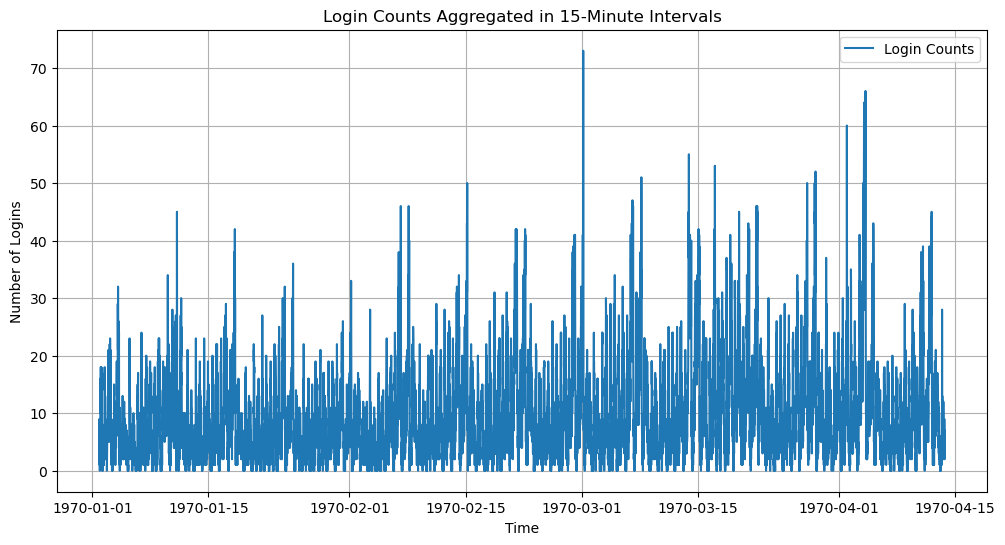

In [7]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(login_counts, label='Login Counts')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.title('Login Counts Aggregated in 15-Minute Intervals')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Display basic statistics to identify potential patterns
login_counts.describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
dtype: float64

The mean number of logins is approximately 9.5 per 15-minute interval, with a wide range (minimum of 0 and maximum of 73).

The distribution indicates that most intervals have fewer than 13 logins, with occasional spikes reaching much higher values.

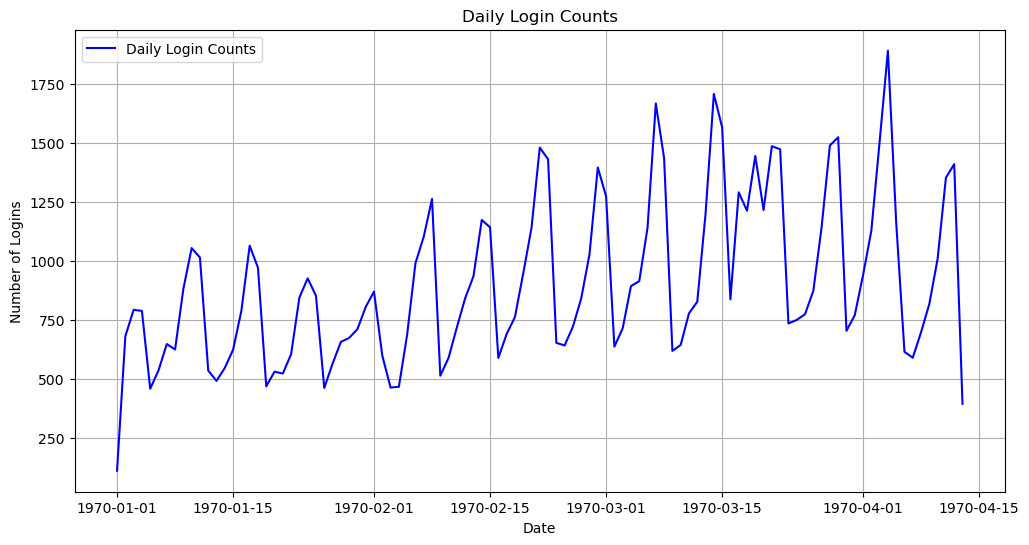

In [9]:
# Aggregate the login counts by day to observe daily cycles
login_counts_daily = login_counts.resample('D').sum()

# Plot daily login counts
plt.figure(figsize=(12, 6))
plt.plot(login_counts_daily, label='Daily Login Counts', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.title('Daily Login Counts')
plt.legend()
plt.grid(True)
plt.show()

**Daily Cycles:**

The daily login counts show significant variability, with some peaks that may indicate higher activity on specific days. The overall trend suggests some cyclic behavior, possibly indicating higher user engagement on specific days of the week or weekends.

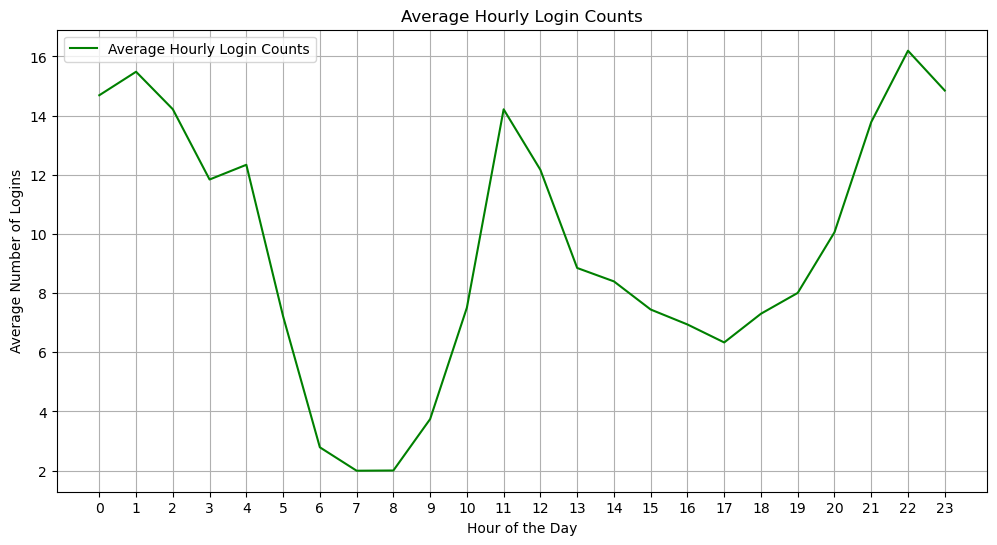

In [10]:
# Aggregate the login counts by hour of the day to observe hourly cycles
login_counts_hourly = login_counts.groupby(login_counts.index.hour).mean()

# Plot hourly login counts to observe daily cycle patterns
plt.figure(figsize=(12, 6))
plt.plot(login_counts_hourly, label='Average Hourly Login Counts', color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Logins')
plt.title('Average Hourly Login Counts')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

**Hourly Patterns:**

The average hourly login counts indicate a clear pattern:

- There is typically higher login activity during the evening hours, with a noticeable peak between 8 PM and midnight.
- There is relatively low activity during early morning hours (e.g., 4-10 AM), which could be explained by typical sleep hours for most users.

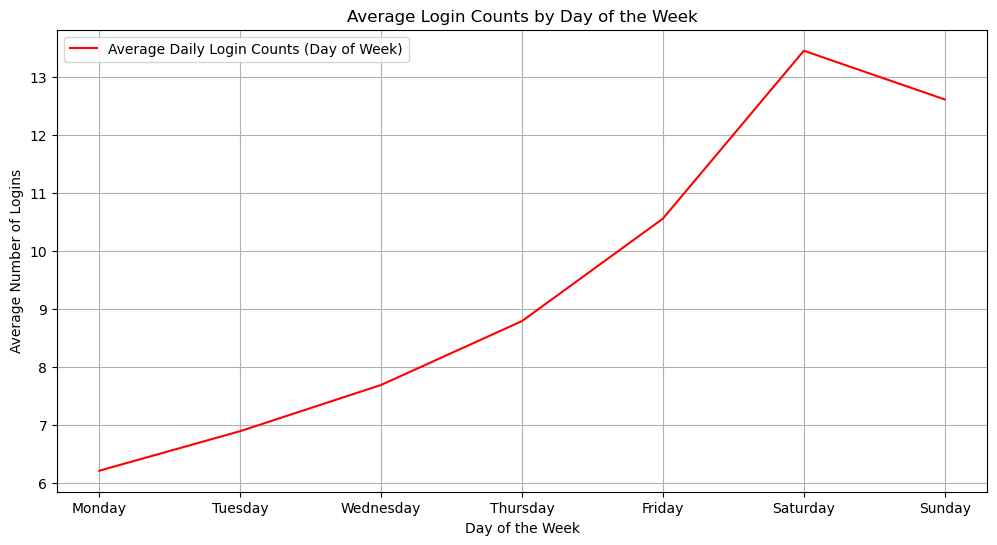

In [11]:
# Aggregate the login counts by day of the week to observe weekly patterns
login_counts_weekly = login_counts.groupby(login_counts.index.dayofweek).mean()

# Plot login counts by day of the week
plt.figure(figsize=(12, 6))
plt.plot(login_counts_weekly, label='Average Daily Login Counts (Day of Week)', color='red')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Logins')
plt.title('Average Login Counts by Day of the Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend()
plt.grid(True)
plt.show()

**Weekly Patterns:**

The weekly login counts reveal distinct patterns in user activity:
- Friday to Sunday exhibit higher average login counts compared to other days, indicating increased usage during weekends.
- Weekdays (Monday through Thursday) have more consistent but lower activity compared to weekends, reflecting typical workweek behavior.

**Data Quality Issues:**

Missing Data or Uneven Gaps: Based on the aggregation and plots, there doesn't seem to be significant missing data, as the time series appears continuous. However, further analysis could involve checking for exact gaps or zero-count intervals that might indicate data collection issues.

Outliers: There are occasional high spikes in login counts during some days, suggesting that there might be special events or anomalous user behavior on those days. It could be beneficial to investigate these peaks further to understand whether they are genuine patterns or data issues.

<h2>PART 2 - Experiment and metrics design</h2>

**1. Key Measure of Success**

The key measure of success for this experiment should be: "Increase in Cross-City Trips by Driver Partners"

*Definition:* A cross-city trip is defined as a trip that starts in one city (e.g., Gotham) and ends in the other city (e.g., Metropolis) or vice versa.

*Why Choose This Metric?* 
- The reimbursement of toll costs is intended to encourage drivers to operate in both cities rather than exclusively serving one city. Measuring cross-city trips directly assesses whether the incentive effectively motivates drivers to bridge the gap between the two cities.
- A higher proportion of cross-city trips will indicate that drivers are willing to cross the toll bridge more frequently.
- Additional supporting metrics may include driver availability in each city and average wait times, which can help to understand if the experiment improves service coverage and customer satisfaction.

**2. Experiment Design**

**a) Implementation of the Experiment**

*Experimental Groups:*

- Treatment Group: A group of driver partners who will receive full toll reimbursement for crossing the bridge between Gotham and Metropolis.
- Control Group: A group of driver partners who will not receive toll reimbursement. This group will serve as a baseline to determine if the toll reimbursement causes a significant increase in cross-city trips.

*Random Assignment:*

- Randomly assign driver partners to either the treatment or control group. This randomization helps eliminate bias by ensuring that individual driver preferences or other confounding factors do not affect the outcome.

*Duration of Experiment:*

- Run the experiment for 4 to 6 weeks to capture the differences across both weekdays and weekends. This will allow enough time to assess consistent behavior patterns and consider the natural circadian activity differences between the two cities.

*Data Collection:*

Track the following key metrics during the experiment:
- Number of cross-city trips by drivers in both the treatment and control groups.
- Total trips for each driver, including city-exclusive and cross-city trips.
- Trip initiation and completion times to understand if the drivers are adjusting their availability based on city-specific activity patterns.
- Toll bridge usage rates between the two cities.

*Control for Other Variables:*

- Ensure that other incentives (e.g., bonuses, promotions) are held constant during the experiment to ensure that the toll reimbursement is the primary variable being tested.
- Monitor for seasonal factors or events that may impact overall driver behavior or demand for rides.

**b) Statistical Test(s) to Verify Significance**

*Hypothesis Testing:*

- Null Hypothesis (H0): There is no significant difference in the number of cross-city trips between the treatment group (with toll reimbursement) and the control group (without toll reimbursement).
- Alternative Hypothesis (H1): The number of cross-city trips is significantly higher in the treatment group compared to the control group.

*Statistical Test:*

- Use a Two-Sample t-test (if the data is normally distributed) or a Mann-Whitney U test (if the data is non-parametric) to compare the mean number of cross-city trips for the treatment and control groups.
- Perform a Chi-Square test to determine if there is a significant association between group assignment (treatment vs. control) and the likelihood of making a cross-city trip.

*Significance Level:*

- Set a significance level (alpha) of 0.05. This means that if the p-value of the statistical test is less than 0.05, we will reject the null hypothesis and conclude that the toll reimbursement has significantly increased cross-city trips.

**c) Interpretation of Results and Recommendations**

*Interpreting the Results:*

If the p-value < 0.05:

- This indicates that the toll reimbursement has led to a statistically significant increase in cross-city trips by driver partners.
- Recommendation: The toll reimbursement policy should be implemented permanently, as it appears to effectively incentivize drivers to operate across both cities.
- Further Analysis: Look at driver earnings and passenger wait times in both cities to determine if the increased availability has improved rider experience and balanced supply and demand.

If the p-value >= 0.05:

- This indicates that the toll reimbursement did not lead to a statistically significant change in cross-city trips.
- Recommendation: Reconsider or modify the incentive structure. For instance, consider higher reimbursements, additional bonuses for frequent cross-city trips, or targeted incentives at specific hours.
- Investigate barriers to cross-city trips, such as driver convenience or preferences, and consider qualitative surveys to understand driver behavior.

*Caveats and Limitations:*

- Driver Preferences: Some drivers may still prefer to stay in their own city despite toll reimbursements, possibly due to familiarity or personal convenience.
- External Factors: Seasonal factors, city events, or road conditions may impact trip behavior during the experiment. Efforts should be made to control or at least monitor such factors.
- Hawthorne Effect: Drivers aware of the experiment may temporarily change their behavior, leading to non-sustainable effects after the experiment ends.

<h2>Part 3 ‐ Predictive modeling</h2>

In [12]:
# Load the dataset and start with data exploration
file_path = '/Users/johnharmer/Library/CloudStorage/GoogleDrive-jwharmeriv@gmail.com/My Drive/Springboard - Data Science/Case Study/ultimate_challenge/ultimate_data_challenge.json'
df = pd.read_json(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


**Key Observations**

*Missing Values:*

- *avg_rating_of_driver* and *avg_rating_by_driver* have a substantial number of missing values. This indicates that not all users provided or received ratings, potentially due to low activity or a lack of trips.
- *phone has* a small number of missing values. Imputation may be necessary, possibly with a placeholder or based on common patterns.

*Data Types:*

- Dates (*signup_date* and *last_trip_date*) are currently of type object. These should be converted to datetime types for easier manipulation and analysis.
- Categorical features like *city* and *phone* will need to be encoded for modeling purposes.


In [14]:
# Check the distribution of numerical features
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [15]:
# Replace missing values of avg_rating_by_driver and avg_rating_of_driver with their respective column means
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

# Verify that missing values are replaced
df[['avg_rating_by_driver', 'avg_rating_of_driver']].isnull().sum()

avg_rating_by_driver    0
avg_rating_of_driver    0
dtype: int64

In [16]:
# Replace missing values in the 'phone' column with 0 (as a placeholder)
df['phone'].fillna(0, inplace=True)

# Verify that missing values are replaced
df['phone'].isnull().sum()

0

In [17]:
# Convert date columns into datetime objects for easier manipulation
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

# Create a reference date, which is the last date in the 'last_trip_date' column
reference_date = df['last_trip_date'].max()

# Create a new binary feature 'retained' based on whether the last trip was within 30 days of the reference date
df['retained'] = (reference_date - df['last_trip_date']).dt.days <= 30

# Convert retained column to integer (0 or 1)
df['retained'] = df['retained'].astype(int)

In [18]:
# Create new features to quantify user activity duration
# Days since signup
df['days_since_signup'] = (reference_date - df['signup_date']).dt.days

# Days since last trip
df['days_since_last_trip'] = (reference_date - df['last_trip_date']).dt.days

# Display the first few rows to verify the changes
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,days_since_signup,days_since_last_trip
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,157,14
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,153,57
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,176,175
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,172,2
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,155,108


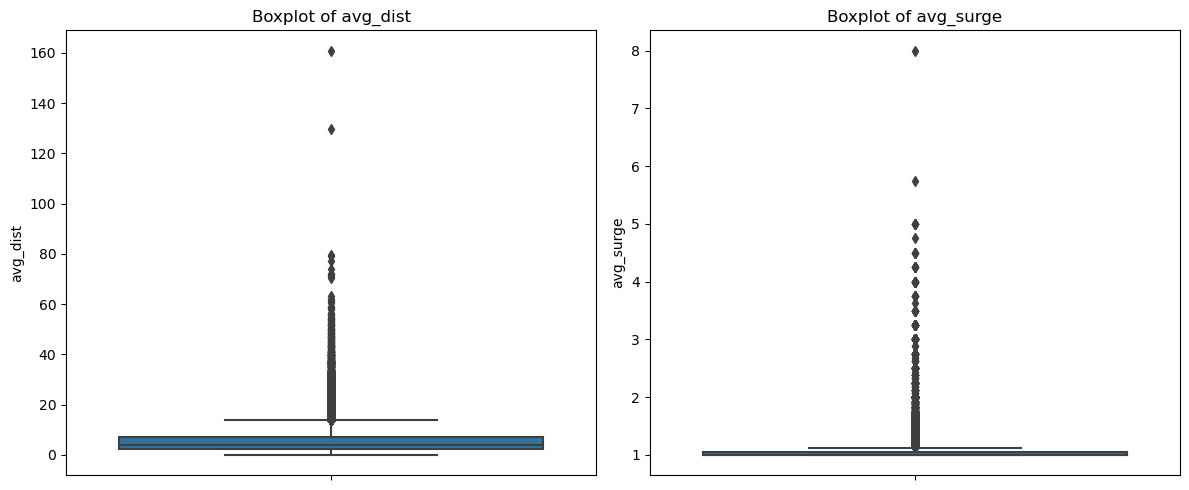

In [19]:
# Identify potential outliers using boxplots for 'avg_dist' and 'avg_surge'
plt.figure(figsize=(12, 5))

# Boxplot for avg_dist
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='avg_dist')
plt.title('Boxplot of avg_dist')

# Boxplot for avg_surge
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='avg_surge')
plt.title('Boxplot of avg_surge')

plt.tight_layout()
plt.show()

In [20]:
# Calculating IQR and handling outliers
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [21]:
# Removing outliers for 'avg_dist' and 'avg_surge'
df_cleaned = remove_outliers(df, 'avg_dist')
df_cleaned = remove_outliers(df_cleaned, 'avg_surge')

# Display summary statistics to verify outlier handling
df_cleaned[['avg_dist', 'avg_surge']].describe()

,avg_dist,avg_surge
count,38963.000000,38963.000000
mean,4.492351,1.016388
std,2.976056,0.036281
min,0.000000,1.000000
25%,2.320000,1.000000
50%,3.640000,1.000000
75%,5.920000,1.000000
max,13.720000,1.150000


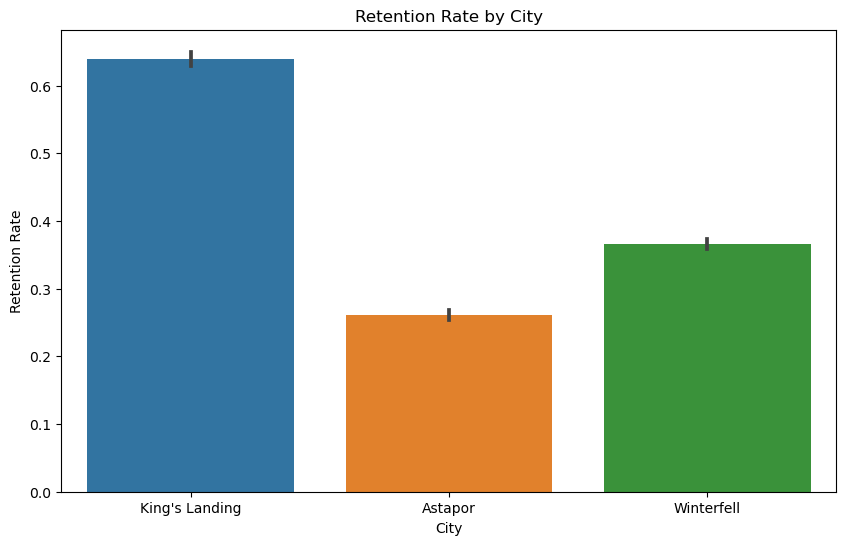

In [22]:
# Display retention rate by city.
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='retained', data=df_cleaned)
plt.title('Retention Rate by City')
plt.ylabel('Retention Rate')
plt.xlabel('City')
plt.show()

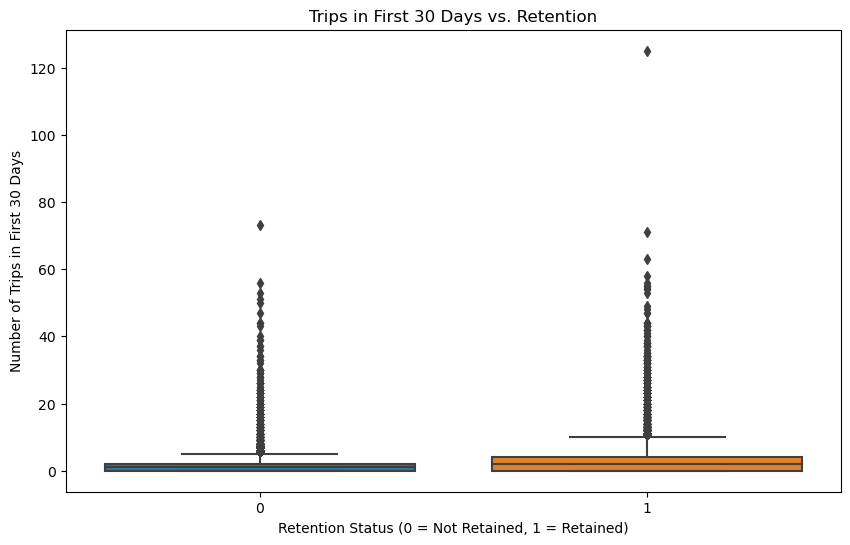

In [23]:
# Visualize Average Trips in first 30 days vs. Retention. This would help in understanding whether users who take more trips in their 
# first 30 days are more likely to be retained.
plt.figure(figsize=(10, 6))
sns.boxplot(x='retained', y='trips_in_first_30_days', data=df_cleaned)
plt.title('Trips in First 30 Days vs. Retention')
plt.xlabel('Retention Status (0 = Not Retained, 1 = Retained)')
plt.ylabel('Number of Trips in First 30 Days')
plt.show()

The median value (middle horizontal line inside the box) for retained users (1) is higher than that for non-retained users (0). This suggests that users who take more trips in their first 30 days are more likely to be retained.The number of trips in the first 30 days is a strong predictor of retention. Users who take more trips early on are significantly more likely to continue using the platform.

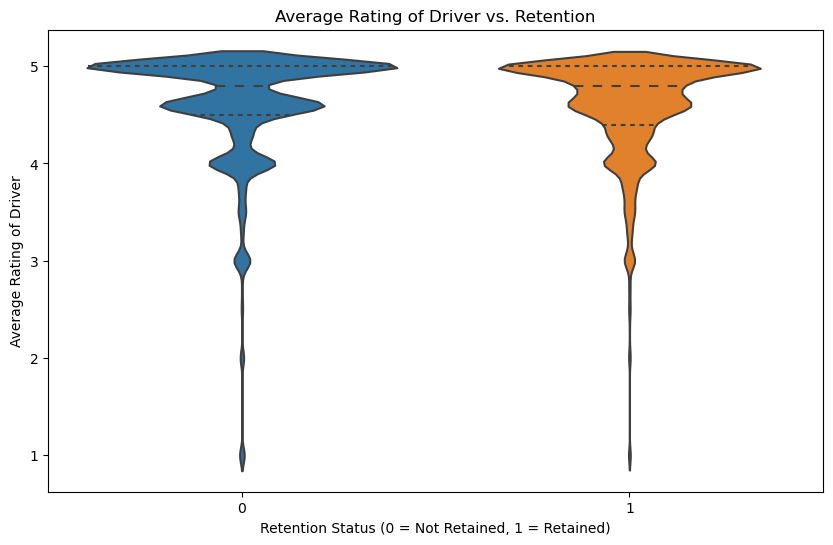

In [24]:
# Visualize Average Rating of Driver vs. Retention to explore if the user's satisfaction with their drivers is related to their likelihood 
# of being retained.
plt.figure(figsize=(10, 6))
sns.violinplot(x='retained', y='avg_rating_of_driver', data=df_cleaned, inner='quartile')
plt.title('Average Rating of Driver vs. Retention')
plt.xlabel('Retention Status (0 = Not Retained, 1 = Retained)')
plt.ylabel('Average Rating of Driver')
plt.show()

The overall shape is similar between both groups, suggesting that average rating of the driver may not be a strong factor that differentiates retained users from non-retained users.

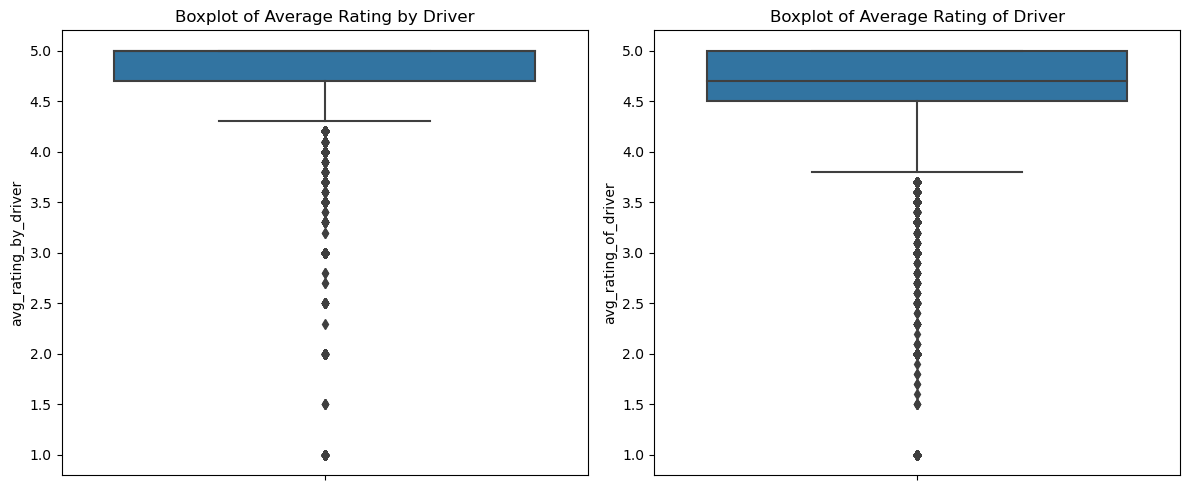

In [25]:
# Look for extreme values in 'avg_rating_by_driver' and 'avg_rating_of_driver'
plt.figure(figsize=(12, 5))

# Boxplot for avg_rating_by_driver
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned, y='avg_rating_by_driver')
plt.title('Boxplot of Average Rating by Driver')

# Boxplot for avg_rating_of_driver
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='avg_rating_of_driver')
plt.title('Boxplot of Average Rating of Driver')

plt.tight_layout()
plt.show()

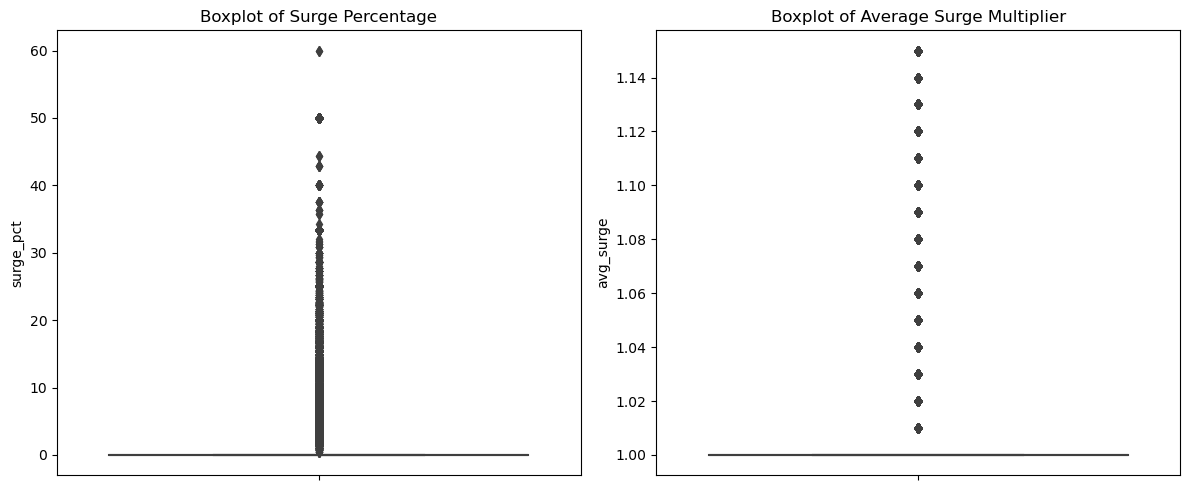

In [26]:
# Visualize distribution of 'surge_pct' and 'avg_surge' for indications of who traveled during periods of high demand, which could impact
# their satisfaction.
plt.figure(figsize=(12, 5))

# Boxplot for surge_pct
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned, y='surge_pct')
plt.title('Boxplot of Surge Percentage')

# Boxplot for avg_surge
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, y='avg_surge')
plt.title('Boxplot of Average Surge Multiplier')

plt.tight_layout()
plt.show()

- The presence of many outliers in *surge_pct* indicates that a subset of users experience surge pricing significantly more than the average. This could negatively impact user experience and retention, particularly if these users are sensitive to higher prices.
- The large difference between the median and outliers in *avg_surge* suggests that the distribution of surge multipliers is highly skewed, indicating that while most users face typical pricing, a small group has disproportionately high surge experiences.

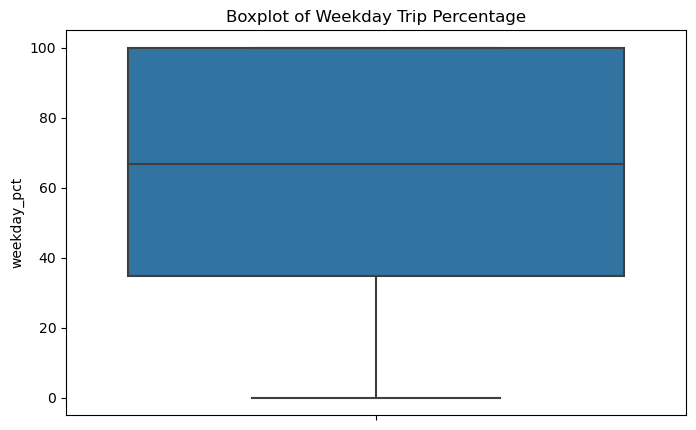

In [27]:
# Examine the percentage of trips that occur during weekdays (weekday_pct)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, y='weekday_pct')
plt.title('Boxplot of Weekday Trip Percentage')
plt.show()

The median value (the middle horizontal line inside the box) appears to be around 50%. This suggests that for many users, trips are equally distributed between weekdays and weekends.

In [47]:
# Define Target and Features
target = 'retained'  # Binary label indicating if a user was active in the preceding 30 days
features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'trips_in_first_30_days', 'weekday_pct', 'surge_pct', 'avg_surge', 'ultimate_black_user', 'days_since_signup']

X = df_cleaned[features]
y = df_cleaned[target]

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    
    # Print evaluation metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc if roc_auc != 'N/A' else 'N/A'}")
    print("-" * 40)

In [49]:
# Model Selection and Evaluation

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(log_reg, X_train, X_test, y_train, y_test)

Model: LogisticRegression
Accuracy: 0.6951
Precision: 0.7029
Recall: 0.3516
F1 Score: 0.4687
ROC-AUC Score: 0.7027313188570563
----------------------------------------


In [50]:
# 2. Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_clf, X_train, X_test, y_train, y_test)

Model: RandomForestClassifier
Accuracy: 0.7308
Precision: 0.6594
Recall: 0.6125
F1 Score: 0.6351
ROC-AUC Score: 0.7829932116482805
----------------------------------------


In [51]:
# 3. Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
evaluate_model(gb_clf, X_train, X_test, y_train, y_test)

Model: GradientBoostingClassifier
Accuracy: 0.7549
Precision: 0.7221
Recall: 0.5840
F1 Score: 0.6458
ROC-AUC Score: 0.8127791474015398
----------------------------------------


In [52]:
# Cross-validation
for model in [log_reg, rf_clf, gb_clf]:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    print(f"Cross-Validation F1 Score for {model.__class__.__name__}: {np.mean(scores):.4f}")
    print("=" * 40)

Cross-Validation F1 Score for LogisticRegression: 0.4669
Cross-Validation F1 Score for RandomForestClassifier: 0.6406
Cross-Validation F1 Score for GradientBoostingClassifier: 0.6496


In [53]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for model in [log_reg, rf_clf, gb_clf]:
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1')
    print(f"Cross-Validation F1 Score for {model.__class__.__name__}: {np.mean(scores):.4f}")
    print("=" * 40)

Cross-Validation F1 Score for LogisticRegression: 0.4687
Cross-Validation F1 Score for RandomForestClassifier: 0.6426
Cross-Validation F1 Score for GradientBoostingClassifier: 0.6481


**Model Performance Summary:** Gradient Boosting models can take longer to train compared to Random Forests. If computational efficiency and speed are a concern, and the performance difference is not significant, Random Forest might still be a viable option.

<h2>Summary:</h2>

I chose to start with a logistic regression as a baseline model due to its simplicity and interpretability. Linear models are often used as a starting point to understand relationships between features. I then progressed to a random forest classifier to capture potential non-linear relationships between features. It is robust to overfitting and provides better generalization capabilites compared to a logistic regression. Finally, I moved to a gradient boosting classifier due to its ability to optimize performance iteratively by building on the errors of previous models. This typically results in high accuracy and reduced bias.

To address the validity of the model, I utilized cross-validation to mitigate overfitting and ensured that no feture contained information that would directly reveal the target (i.e., avoiding data leakage). I also created features such as *days_since_signup* and *days_since_last_trip* to add temporal context, which is crucial for retention prediction.

The models I built (especially the Gradient Boosting Classifier) provide a good balance of performance and complexity for predicting user retention in the 6th month. The cross-validation F1 score for Gradient Boosting (0.6496) indicates a decent level of validity for this task, making it a useful tool for Ultimate to understand and enhance user retention strategies.

Ultimate can leverage the insights from the model by focusing on key drivers of retention. For example, users who took more trips in their first 30 days or rated their drivers highly are more likely to be retained. Therefore, Ultimate could incentivize new users to take more initial trips through targeted promotions and ensure high service quality to boost ratings. Additionally, features like avg_surge and weekday_pct provide insights into user preferences, which can be used to personalize offerings and reduce friction, ultimately improving long-term retention.